In [1]:
import numpy as np
import pandas as pd

import neurokit2 as nk
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [15, 5]

In [3]:
# simulate 10 seconds of EDA signal (250 samples/ sec  == 250Hz)
eda_signal = nk.eda_simulate(duration=10, sampling_rate=250, scr_number=3, drift=0.01)

### Raw EDA Signal

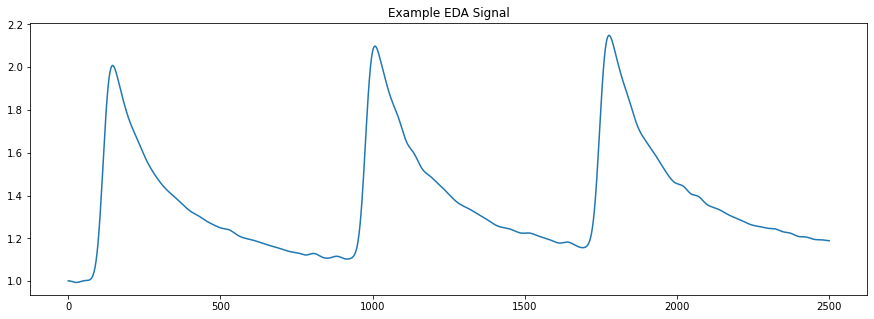

In [4]:
plt.plot(eda_signal.view())
plt.title("Example EDA Signal")
plt.show()

### Locate Skin Conductance Response (SCR) Features

In [20]:
signals, info = nk.eda_process(eda_signal, sampling_rate=250)

In [6]:
# dataframe containing different signals from original EDA data
signals.columns

Index(['EDA_Raw', 'EDA_Clean', 'EDA_Tonic', 'EDA_Phasic', 'SCR_Onsets',
       'SCR_Peaks', 'SCR_Height', 'SCR_Amplitude', 'SCR_RiseTime',
       'SCR_Recovery', 'SCR_RecoveryTime'],
      dtype='object')

In [7]:
# info about processed EDA signal
info

{'SCR_Onsets': array([ 316,  948, 1782], dtype=int64),
 'SCR_Peaks': array([ 406, 1035, 1872], dtype=int64),
 'SCR_Height': array([0.72442229, 0.75258386, 0.75214312]),
 'SCR_Amplitude': array([1.00274816, 0.99157782, 1.01809864]),
 'SCR_RiseTime': array([0.36 , 0.348, 0.36 ]),
 'SCR_Recovery': array([ 527., 1151., 2011.]),
 'SCR_RecoveryTime': array([0.484, 0.464, 0.556])}

In [8]:
# extract clean EDA and SCR features
cleaned = signals['EDA_Clean']
features = [info['SCR_Onsets'], info['SCR_Peaks'], info['SCR_Recovery']]

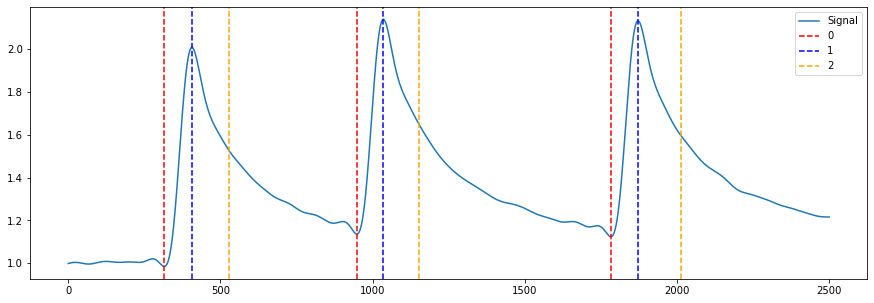

In [9]:
# visualize SCR features in cleaned EDA signal
plot = nk.events_plot(features, cleaned, color=['red', 'blue', 'orange'])

### Decompose EDA into Phasic and Tonic Components
##### Phasic ~ Phasic Skin Conductance Response (SCR)
##### Tonic  ~ Tonic Skin Conductance Level (SCL)

In [10]:
# Filter phasic and tonic components
# NOTE: here we standardize the raw EDA signal before decomposition, which can be useful in the presence of high inter-individual variations
data = nk.eda_phasic(nk.standardize(eda_signal), sampling_rate=250)

<AxesSubplot:>

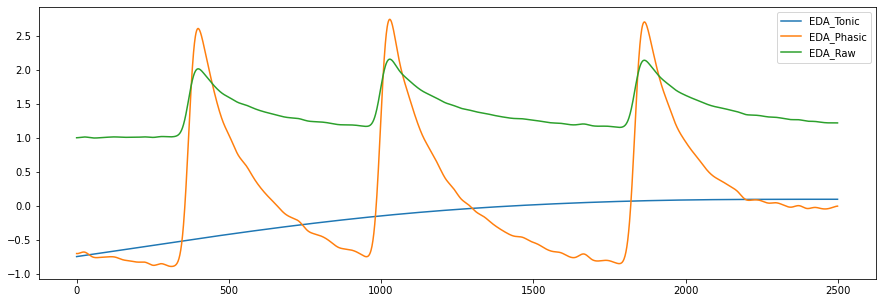

In [11]:
data["EDA_Raw"] = eda_signal # add raw signal to data so we can see before & after decomposition
data.plot()

### Quick Plot

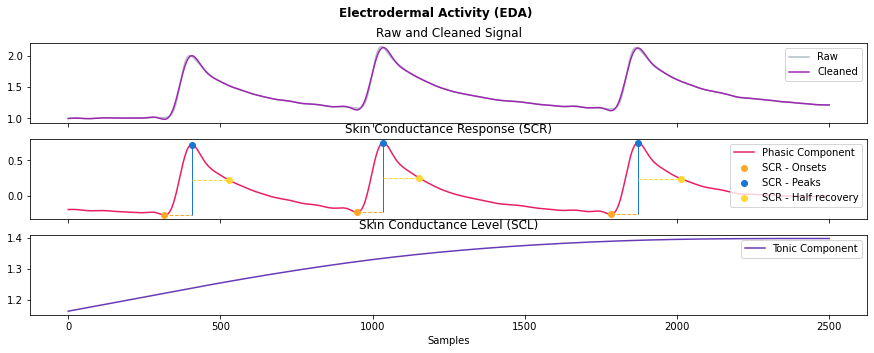

In [12]:
# you can obtain all of these features by using the eda_plot() function on the dataframe of processed EDA
plot = nk.eda_plot(signals)

### Different cleaning methods

In [16]:
signals = pd.DataFrame({
    "EDA_Raw": eda_signal,
    "EDA_BioSPPy": nk.eda_clean(eda_signal, sampling_rate=250, method='biosppy'),
    "EDA_NeuroKit": nk.eda_clean(eda_signal, sampling_rate=250, method='neurokit')
})

<AxesSubplot:>

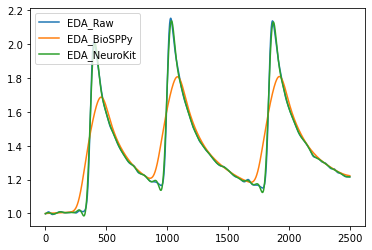

In [17]:
signals.plot()

In [18]:
import scipy

In [19]:
help(scipy.signal.butter)

Help on function butter in module scipy.signal.filter_design:

butter(N, Wn, btype='low', analog=False, output='ba', fs=None)
    Butterworth digital and analog filter design.
    
    Design an Nth-order digital or analog Butterworth filter and return
    the filter coefficients.
    
    Parameters
    ----------
    N : int
        The order of the filter.
    Wn : array_like
        The critical frequency or frequencies. For lowpass and highpass
        filters, Wn is a scalar; for bandpass and bandstop filters,
        Wn is a length-2 sequence.
    
        For a Butterworth filter, this is the point at which the gain
        drops to 1/sqrt(2) that of the passband (the "-3 dB point").
    
        For digital filters, `Wn` are in the same units as `fs`.  By default,
        `fs` is 2 half-cycles/sample, so these are normalized from 0 to 1,
        where 1 is the Nyquist frequency. (`Wn` is thus in
        half-cycles / sample.)
    
        For analog filters, `Wn` is an angular

In [23]:
np.array(5) / 51.2 * 2 

0.1953125